# Анализ рынка недвижимости г. Санкт-Петербург


**Цели и задачи проекта:** Требуется определить рыночную стоимость объектов недвижимости в зависимости от различных параметров.

**Входные данные:** архив объявлений на основе данных сервиса Яндекс.Недвижимостьо о продаже квартир в Санкт-Петербурге и его окрестностей. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Обозначения категорий исходных данных:**
* *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
* *balcony* — число балконов
* *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (булев тип)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах(м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (булев тип)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms* — число комнат
* *studio* — квартира-студия (булев тип)
* *total_area* — площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

**План работы** над проектом включает в себя выполнение следующих шагов:
* *Импорт исходных данных и библиотек Python.* На этом этапе получаем общую информацию об имеющейся у нас в распоряжении информации, типах данных, их полноте и правильности представления.
* *Предварительная обработка данных.* В этой части работы обращаем пристальное внимание на недостатки исходных данных и их релевантность: категоризируем пропуски, обрабатываем пропуски в данных, преобразуем данные в верный тип, проверяем их на присутствие ошибочных значений и обрабатываем дубликаты с целью исключения искажений в результатах.   
* *Анализ данных.* Данный этап позволяет ответить на вопросы, каким образом и в какой степени та или иная характеристика может оказать влияние на стоимость квартиры. Указанные зависимости отражаются в сводных таблицах и графиках по результатам группировки, подсчету и аггрегирования различных данных. Анализ позволяет критически оценить полученные результаты и оценить их достоверность.
* *Формулирование общего вывода*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе по проекту мы отразим ключевые рекомендации о степени влияния различных факторов на общую стоимость "типовой" квартирыи характерные зависимости.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-изучение-общей-информации" data-toc-modified-id="Импорт-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-и-замена-типов-данных" data-toc-modified-id="Обработка-пропусков-и-замена-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков и замена типов данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-в-первой-группе-данных" data-toc-modified-id="Обработка-пропусков-в-первой-группе-данных-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Обработка пропусков в первой группе данных</a></span></li><li><span><a href="#Обработка-пропусков-во-второй-группе-данных" data-toc-modified-id="Обработка-пропусков-во-второй-группе-данных-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Обработка пропусков во второй группе данных</a></span></li><li><span><a href="#Обработка-пропусков-в-третьей-группе-данных" data-toc-modified-id="Обработка-пропусков-в-третьей-группе-данных-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Обработка пропусков в третьей группе данных</a></span></li><li><span><a href="#Обработка-пропусков-в-четвертой-группе-данных" data-toc-modified-id="Обработка-пропусков-в-четвертой-группе-данных-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Обработка пропусков в четвертой группе данных</a></span></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-квартир-и-удаление-выбивающихся-значений" data-toc-modified-id="Изучение-параметров-квартир-и-удаление-выбивающихся-значений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров квартир и удаление выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Стоимость" data-toc-modified-id="Стоимость-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Стоимость</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Время-продажи" data-toc-modified-id="Время-продажи-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Время продажи</a></span></li><li><span><a href="#Удаленность-от-центра-города" data-toc-modified-id="Удаленность-от-центра-города-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Удаленность от центра города</a></span></li></ul></li><li><span><a href="#Оценка-влияния-факторов-на-стоимость-квартир" data-toc-modified-id="Оценка-влияния-факторов-на-стоимость-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Оценка влияния факторов на стоимость квартир</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Удаленность-от-центра-города" data-toc-modified-id="Удаленность-от-центра-города-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Удаленность от центра города</a></span></li><li><span><a href="#Дата-размещения-объявления" data-toc-modified-id="Дата-размещения-объявления-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Дата размещения объявления</a></span></li></ul></li><li><span><a href="#ТОП10-населённых-пунктов-с-самой-высокой-и-низкой-стоимостью-жилья" data-toc-modified-id="ТОП10-населённых-пунктов-с-самой-высокой-и-низкой-стоимостью-жилья-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ТОП10 населённых пунктов с самой высокой и низкой стоимостью жилья</a></span></li><li><span><a href="#Выявление-центра-города-по-изменению-цены" data-toc-modified-id="Выявление-центра-города-по-изменению-цены-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выявление центра города по изменению цены</a></span></li><li><span><a href="#Квартиры:-центр-vs.-все-районы" data-toc-modified-id="Квартиры:-центр-vs.-все-районы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Квартиры: центр vs. все районы</a></span><ul class="toc-item"><li><span><a href="#Сравнение-параметров-квартир" data-toc-modified-id="Сравнение-параметров-квартир-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Сравнение параметров квартир</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартир" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартир-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартир</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт данных и изучение общей информации

In [1]:
# установка пакета Seaborn
!pip install seaborn==0.11.2 -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [4]:
# Вывод всех колонок датафрейма и его 10 рандомных строк
df.index.name = 'id'
pd.set_option('display.max_columns', None)
display(df.sample(10, random_state=1), )

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
id,,,,,,,,,,,,,,,,,,,,,,
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,False,False,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.0,2,False,False,False,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.5,2,NaN,False,False,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.6,1,NaN,False,False,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.0,3,NaN,False,False,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
8363,13,5690000.0,41.7,2016-12-29T00:00:00,2,3.20,5.0,23.0,2,NaN,False,False,7.5,0.0,Санкт-Петербург,23963.0,3530.0,2.0,352.0,3.0,341.0,283.0
15270,15,4999000.0,42.0,2018-11-23T00:00:00,1,2.80,17.0,22.0,4,NaN,False,False,11.0,2.0,Санкт-Петербург,30571.0,11470.0,1.0,721.0,0.0,NaN,60.0
2143,4,3350000.0,55.5,2017-11-14T00:00:00,2,NaN,5.0,33.5,3,NaN,False,False,8.5,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,211.0
11284,17,3200000.0,48.0,2017-10-25T00:00:00,1,2.80,9.0,19.0,4,NaN,False,False,11.5,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,246.0


Получим информацию о количестве и типах исходных данных, а также оценим их на соответствие дальнейшему анализу:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходный датафрейм включает в себя 23699 строк с информацией о квартирах, разделенной по 22-м параметрам-характеристикам. Предварительное ознакомление с данными позволяет заметить, что в некоторых параметрах имеются пропуски. Их появление может быть обусловлено различными причинами:
* характеристика квартиры, указанная для заполнения в анкете, не применима к квартире, выставленной на продажу. Примером могут служить пропуски в таких колонках как: (а) относится ли квартира к апартаментам и (б) имеется ли в квартире балкон. В этом случае, пользователю, в большинстве случаев, гораздо проще пропустить такое поле, чем зафиксировать отрицательный ответ или указать какое-либо значение (в случае расстояния). Есть вероятность, что некоторые продавцы не знают точного определения, какая категория недвижимости относится к апартаментам, а также, что указывать, если вместо балкона в квартире имеется лоджия.
* пропуски могут быть связаны с несовершенством обработки картографической информации. К примеру, пропуски в параметрах количество парков/водоемов в радиусе 3 км могут быть вызваны тем, что алгоритм не выявил количество парков/водоемов на требуемом расстоянии от квартиры, но не использовал целочисленное значение 0, чтобы это отобразить. Некорректная обработка картографической информации может быть также связана с имеющимися ограничениями по оцениваемому расстоянию или отсутствие в анкете точного адреса, как точки отсчета. Примером таких пропусков могут служить расстояния до аэропорта, водоема или сквера, а также центра города.
* при заполнении анкеты пользователями пропуски могут быть результатом случайности. К примеру, наличие небольшого количества пропусков в названии населенного пункта вряд ли было целью желающих продать квартиру. В этой связи одной из рекомендаций для совершенствования системы обработки объявлений о продаже квартир является предупреждение пользователя о невозможности публикации объявления без указания населенного пункта. В случае, если такое предупреждение уже имеется, разработчикам требуется проверить правильность выгрузки данных.  
* распространенной причиной наличия пропусков может служить также незнание или неимение точной информации продавцом / риэлторским агентством о какой-либо запрашиваемой характеристике (например, высота потолка, число этажей в здании, жилая площадь, площадь кухни). Такие пропуски обрабатывать необходимо с осторожностью. Для определения высоты потолков, к примеру, можно использовать этажность зданий из предположения, что для типовых зданий одной этажности высоты потолков будут одинаковы. Тем не менее, в таких случаях желательно иметь дополнительный параметр, который подтверждал бы год постройки.
* в данных также могут присутствовать неслучайные пропуски, требующие дополнительного внимания разработчиков. В данном проекте, к ним можно отнести критерий сколько дней было размещено объявление (от публикации до снятия). При известной дате публикации объявления отсутствие данных для этого параметра на момент выгрузки может свидетельствовать о возможной ошибке.  

Предварительно ознакомимся с данными на предмет присутствия в них отрицательных и подозрительных значений, используя вывод минимальных и максимальных значений для численных параметров датасета:

In [6]:
df.describe().loc[['min','max']]

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


Приведем названия населенных пунктов к нижнему реестру для проверки на присутствие дубликатов:

In [7]:
df['locality_name'] = df['locality_name'].str.lower()

Приведем к единому стандарту слово 'поселок', заменив его на 'посёлок':

In [8]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

Оценим, содержит ли датафрейм дубликаты:

In [9]:
duplicates_amount = df.duplicated().sum()
print('Количество дубликатов в данных:', duplicates_amount)

Количество дубликатов в данных: 0


**Промежуточные выводы:**

* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов
* Разделителем данных в файле является \ (обратный слэш)
* Названия колонок представлены в едином формате и не требуют переименования
* В исходном датафрейме 23699 строк и 22 колонки
* Колонки, которые не содержат пропуски: <i>total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan</i>. Оставшиеся колонки имеют различное количество пропусков, которые требуется проанализировать более детально.
* Колонки, требующие преобразования типов данных: <br>
**<i>last_price</i>** - из float64 в int64 - для цен на недвижимость характерно использовать целые значения <br>
**<i>first_day_exposition</i>** - из object в datetime64 <br>
**<i>floors_total</i>** - из float64 в int64 - количество этажей в доме является целым числом <br>
**<i>is_apartment</i>** - из object в bool - логический тип данных, указывающий на то, является ли помещение аппартаментами или нет <br>
**<i>airports_nearest</i>** - из float64 в int64 - значения расстояний до ближайшего аэропорт указаны в метрах, что обеспечивает необходимую точность при переводе в целочисленный тип данных <br>
**<i>cityCenters_nearest</i>** - из float64 в int64 - расстояние до центра города указано в метрах, что обеспечивает необходимую точность при переводе в целочисленный тип данных <br>
**<i>parks_around3000</i>** - из float64 в int64 - количество парков является целым числом <br>
**<i>ponds_nearest</i>** - из float64 в int64 - расстояние указано в метрах, что обеспечивает необходимую точность при переводе в целочисленный тип данных <br>
**<i>days_exposition</i>** - из float64 в int64 <br>
* Исходные данные не содержат дубликатов и отрицательных значений, однако в колонках <i>ceiling_height, living_area, kitchen_area</i>, представлены значения-экстремумы, требующие дополнительной проверки и уточнения.

## Предобработка данных

### Обработка пропусков и замена типов данных

Приведем даты публикации объявлений переменной first_day_exposition к типу данных datetime64:

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Приведем цену на момент снятия публикации переменной last_price к типу данных int6464:

In [11]:
df['last_price'] = df['last_price'].astype('int64')

Определим процент пропусков в имеющихся исходных данных и выведем по убыванию только те названия столбцов, которые их содержат:

In [12]:
df.isna().mean() \
    .to_frame(name='nans_pct').query('nans_pct > 0') \
    .sort_values(by = 'nans_pct', ascending = False) \
    .round(3) * 100

,nans_pct
is_apartment,88.3
parks_nearest,65.9
ponds_nearest,61.6
balcony,48.6
ceiling_height,38.8
airports_nearest,23.4
cityCenters_nearest,23.3
parks_around3000,23.3
ponds_around3000,23.3
days_exposition,13.4


Разделим пропуски на несколько групп. 

К **первой группе** отнесем те пропущенные значения, где логически можно предположить замену: 
* <i>is_apartment</i> - NaN, скорее всего, индикатор того, что недвижимость не является аппартаментами. Заменяем NaN на False. 
* <i>balcony</i> - NaN, вероятнее всего, показатель отсутствия балкона. Заменяем NaN на 0. Рекомендуем также разработчикам расширить (либо ввести новый параметр) термин балкон еще и на лоджию.
* <i>parks_around3000, ponds_around3000</i> - NaN, вероятнее всего, указывает на отсутствие парков или водоема в радиусе 3 км.

Ко **второй группе** отнесем пропуски, процент которых достаточно высок, чтобы удалить данные без значительных потерь в информации, и которые требуют замены для дальнейшего анализа, исходя из предлагаемых гипотез:
* <i>kitchen_area</i> - предлагается использовать медианное значение, которое может быть характерно для числа комнат и общей площади. Дополнительным условием проверки будет служить является ли квартира-студией.
* <i>living_area</i> - предлагается использовать медианное значение, которое может быть характерно для числа комнат в квартире/доме/аппартаментах.
* <i>ceiling_height</i> - предлагается использовать медианное значение, которое может быть характерно для этажности здания.
* <i>airports_nearest</i> - NaN, вероятнее всего, связаны с тем, что населенный пункт не относится к Санкт-Петербургу. Данное предположение требует проверки при выполнении проекта. Возможно заменить медианными значениями расстояния до аэропорта.
* <i>cityCenters_nearest</i> - NaN, вероятнее всего, связаны с тем, что населенный пункт не относится к Санкт-Петербургу. Данное предположение требует проверки при выполнении проекта. Возможно заменить медианными значениями расстояния до населенного пункта.

К **третьей группе** отнесем пропуски, доля которых невысока, но которые невозможно заменить, исходя из имеющихся данных:
* <i>locality_name</i> - NaN указывает, что название населенного пункта неизвестно и нет возможности его установить. Так как в данном исследовании процент таких отсутствующих данных низкий (0,2%), то пропущенные строки будут удалены.
* <i>floors_total</i> - NaN указывает, что этажность не указана. Так как в данном исследовании процент таких отсутствующих данных невысокий (0,4%) и нет возможности достоверно установить количество этажей, не внося дополнительной ошибки, то пропущенные строки будут удалены.

К **четвертой группе** отнесем пропуски, доля которых значительна, но которые невозможно заменить на информативные значения, исходя из имеющихся данных:
* <i>days_exposition</i> - NaN указывает, что неизвестно, сколько дней было размещено объявление. Установить это не представляется возможным. Так как процент пропусков достаточно высокий (13,4%), то следует проинформировать разработчиков о проблеме. Пропуски в этом столбце удаляться не будут, для того, чтобы не потерять значимые данные других известных характеристик.
* <i>parks_nearest, ponds_nearest</i> - NaN являются индикатором отсутствия данных о расстоянии до парка/водоема, данные которых достоверно невозможно установить. Процент пропусков высокий (> 60%).

#### Обработка пропусков в первой группе данных

**(A)** Заменим пропуски в столбце аппартаменты, исходя из предположения, что пропущенные данные указывают на то, что объект недвижимости не является аппартаментами, и изменим тип данных:

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')
df['is_apartment'].value_counts(normalize = True).round(3) * 100

False    99.8
True      0.2
Name: is_apartment, dtype: float64

**(B)** Заменим пропуски в столбце, указывающем на количество балконов, исходя из предположения, что пропуски указывают на отсутствие балкона, и изменим тип данных:

In [14]:
df['balcony'] = df['balcony'].fillna(0).astype('int64')
df['balcony'].value_counts(normalize = True).round(3) * 100

0    64.5
1    17.7
2    15.4
5     1.3
4     0.8
3     0.3
Name: balcony, dtype: float64

**(C)** Заменим пропуски и тип данных в столбцах, указывающих на количество парков/водоемов в радиусе 3 км, на 0, исходя из предположения, что пропуски указывают на отсутствие парка или водоема:

In [15]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int64')

#### Обработка пропусков во второй группе данных

**(A)** Удалим данные с количеством комнат меньше 1:

In [16]:
df.drop(df[df['rooms'] < 1].index, inplace = True)

**(В)** Обработаем некорректные значения и удалим пропуски для высоты потолка:

In [17]:
df['ceiling_height'] = df['ceiling_height'].round(1)

Для жилых помещений минимальная норма высоты потолка составляет 2,4 м. Максимальная высота нормами не ограничена, и в данной работе, исходя из частотного распределения принята на начальном этапе 4,2 м. Строки данных со значениями высоты потолка, выходящие за рамки принятого интервала будут удалены:

In [18]:
df.drop(df[df['ceiling_height'] < 2.4].index, inplace = True)
df.drop(df[df['ceiling_height'] > 4.2].index, inplace = True)

Замену пропущенных значений в высоте потолка произведем из предположения, что для определенной этажности зданий имеются характерные высоты потолков.

In [19]:
# Создание словарика, который включает медианные значения высоты потолка для зданий определенной этажности
median_ceiling_height_dict = df.groupby('floors_total')['ceiling_height'].median().to_dict()

In [20]:
# Замена пропущенных значений высоты потолка на медианное значение в соответствии с этажностью
df['ceiling_height'] = df['ceiling_height'].fillna(df['floors_total'].map(median_ceiling_height_dict))

**(C)** Заменим пропуски в исходных данных для жилой площади и площади кухни:

1) Проверим, наблюдается ли корреляция между жилой площадью/площадью кухни и общей площадью квартиры.

In [21]:
corr_living_area_total_area = \
                        df[['living_area', 'total_area']].corr()
corr_living_area_total_area

,living_area,total_area
living_area,1.000000,0.937962
total_area,0.937962,1.000000


In [22]:
corr_kitchen_area_total_area = \
                        df[['kitchen_area', 'total_area']].corr()
corr_kitchen_area_total_area

,kitchen_area,total_area
kitchen_area,1.000000,0.607314
total_area,0.607314,1.000000


Полученные коэффициенты корреляции свидетельствуют о тесной связи между двумя параметрами. Следовательно, обработка пропусков исходя из зависимости жилой площади / площади кухни от общей площади квартиры является обоснованной. 

2) Определим доли living_area и kitchen_area в общей площади квартиры. Отметим, что квартиры-студии (145 шт.), где площадь кухни по нормам входит в общую площадь и не указывается отдельно, будут характеризоваться в соответствии с этим же принципом. 

In [23]:
df['living_area_fraction'] = (df['living_area'] / df['total_area']).round(2)

In [24]:
df['kitchen_area_fraction'] = (df['kitchen_area'] / df['total_area']).round(2)

3) Присвоим пропускам значения, из условия совпадения числа комнат, равные медианному значению доли жилой площади (или площади кухни), умноженному на соответствующее значение общей площади:

In [25]:
for room in df['rooms'].unique():
    df.loc[(df['living_area'].isna())&(df['rooms'] == room), 'living_area'] = \
    df.loc[(df['rooms'] == room), 'living_area_fraction'].median() * df['total_area']

In [26]:
warnings.filterwarnings('ignore') # отключил ожидаемое предупреждение, возникающее из-за отсутствия в исходных данных
                                  # значений для некоторых населенных пунктов для вычисления медианы

In [27]:
for room in df['rooms'].unique():
    df.loc[(df['kitchen_area'].isna())&(df['rooms'] == room), 'kitchen_area'] = \
    df.loc[(df['rooms'] == room), 'kitchen_area_fraction'].median() * df['total_area']

In [28]:
df[['living_area', 'kitchen_area']] = df[['living_area', 'kitchen_area']].round(1)

4) Заменим оставшиеся пропуски (из-за отсутствия данных по некоторым населенным пунктам для вычисления медианы) на '-999': 

In [29]:
df['kitchen_area'] = df['kitchen_area'].fillna(-999).astype('int64')

**(D)** Проверим, какое количество пропусков есть в столбце, указывающем на расстояние до аэропорта, относятся к Санкт-Петербургу, а также к другим населенным пунктам:

In [30]:
# Сумма пропусков в столбце расстояний до аэропорта для Санкт-Петербурга 
len(df.loc[(df['airports_nearest'].isna())&(df['locality_name'] =='санкт-петербург')])

82

In [31]:
# Сумма пропусков в столбце расстояний до аэропорта для населенных пунктов, находящихся за пределами Санкт-Петербурга
len(df.loc[(df['airports_nearest'].isna())&(df['locality_name'] !='санкт-петербург')])

5351

Пропущенные значения, относящиеся к Санкт-Петербургу и другим населенным пунктам будут заменены на медианные значения, характерные для уникального места. В случае, когда медиану для населенного пункта вычислить нельзя (характерно для некоторых небольших деревень и поселков), в качестве замены будет использоваться медиана расстояния для всех населенных пунктов, находящихся за пределами Санкт-Петербурга.

In [32]:
def nan_data_present(df, distance, location):
    """
    Функция проверяет данные на наличие пропусков в расстоянии до аэропорта/центра города для всех населенных пунктов и
    выполняет их замену на медиану, характерную для этого населенного пункта, если доступны данные.
    """
    for type_unique in df[location].unique():
        df.loc[(df[distance].isna())&(df[location] == type_unique), distance] = \
        df.loc[df[location] == type_unique, distance].median()
    return df

In [33]:
def nan_data_absent(df, distance, location):
    """
    Функция повторно проверяет данные на наличие пропусков в расстоянии до аэропорта/центра города для случая,
    когда населенный пункт находится за пределами Санкт-Петербурга. Такой населенный пункт может быть представлен
    одним пропуском или все данные для него пропущены. В этом случае, функция выполняет замену пропусков на медиану,
    относящуюся для всех населенных пунктов за пределами СПб. Повторная проверка необходима, чтобы получить более
    точное значение медианы, с учетом ранее замененных пропусков по имеющимся значениям за пределами СПб.
    """
    for type_unique2 in df[location].unique():
        df.loc[(df[distance].isna())&(df[location] != 'санкт-петербург'), distance] = \
        df.loc[df[location] == type_unique2, distance].median()
    return df

In [34]:
df = nan_data_present(df, 'airports_nearest', 'locality_name')

In [35]:
df = nan_data_absent(df, 'airports_nearest', 'locality_name')

Заменим тип данных на целочисленный:

In [36]:
df['airports_nearest'] = df['airports_nearest'].astype('int64')

**(E)** По аналогии с предыдущим пунктом проверим, какое количество пропусков есть в столбце, указывающем на расстояние до центра города и заменим их:

In [37]:
# Сумма пропусков в столбце расстояний до центра города для Санкт-Петербурга 
len(df.loc[(df['cityCenters_nearest'].isna())&(df['locality_name'] =='санкт-Петербург')])

0

In [38]:
# Сумма пропусков в столбце расстояний до центра города для населенных пунктов, находящихся за пределами Санкт-Петербурга
len(df.loc[(df['cityCenters_nearest'].isna())&(df['locality_name'] !='санкт-Петербург')])

5413

In [39]:
df = nan_data_present(df, 'cityCenters_nearest', 'locality_name')

In [40]:
df = nan_data_absent(df, 'cityCenters_nearest', 'locality_name')

Заменим тип данных на целочисленный:

In [41]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int64')

#### Обработка пропусков в третьей группе данных

**(A)** Удалим строки, содержащие пропуски в переменной, характеризующей название населенных пунктов:

In [42]:
df.dropna(subset=['locality_name'], inplace=True)

**(B)** Удалим строки, содержащие пропуски в переменной этажности здания и заменим тип оставшихся данных:

In [43]:
df.dropna(subset=['floors_total'], inplace=True)

In [44]:
df['floors_total'] = df['floors_total'].astype('int64')

#### Обработка пропусков в четвертой группе данных

**(A)** В исходных данных отсутствует дата снятия объявления, поэтому установить сколько дней было размещено объявление не представляется возможным. Для сохранения имеющейся информации, пропуски в данном параметре будут заменены на значение '-999':

In [45]:
df['days_exposition'] = df['days_exposition'].fillna(-999).astype('int64')

**(B)** Процент пропусков в данных о расстоянии до ближайшего парка/пруда очень высокий (более 60%). Любая их замена приведет к искажению данных и их распределения. В данном проекте пропуски были заменены на значение '-999', которое не будет учитываться в расчетах, но станет индикатором того, что пропуски присутствуют в переменных parks_nearest и ponds_nearest и их доля высока.

In [46]:
df['parks_nearest'] = df['parks_nearest'].fillna(-999).astype('int64')
df['ponds_nearest'] = df['ponds_nearest'].fillna(-999).astype('int64')

**Промежуточные выводы:**
* В исходном датафрейме присутствует достаточно большое количество пропущенных значений в различных параметрах.
* Пропуски были условно разделены на 4 группы и обработаны различными алгоримами в зависимости от принадлежности к конкретной группе.
* Пропуски первой группы были заменены на значения в соответствии с логическими предположениями.
* Пропуски второй группы были заменены с использованием гипотез и соответствующих расчетов.
* Пропуски в третьей группе были удалены из-за их небольшой доли в датафрейме и невозможности замены на основе логических заключений или гипотез.
* Пропуски четвертой группы были обработаны с использованием значения-индикатора, позволяющего их не удалять, чтобы сохранить другие данные. 

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу стоимость квадратного метра недвижимости:

In [47]:
df['cost_per_metersq'] = (df['last_price'] / df['total_area']).astype('int64')

Добавим в таблицу: месяц, день недели и год публикации объявления, преобразовав исходную дату публикации объявления:

In [48]:
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_day'] = df['first_day_exposition'].dt.day_name()
df['exposition_year'] = df['first_day_exposition'].dt.year

Создадим три категории для этажа квартиры: 'первый', 'последний' и 'другие' и добавим их в таблицу в качестве нового столбца:

In [49]:
df['floor_category'] = np.where(df['floor'] == 1, 'первый этаж', \
                       np.where(df['floor'] == df['floors_total'], 'последний этаж', 'другой'))

Пересчитаем соотношения между жилой и общей площадью, а также отношения площади кухни к общей площади после проведения предобработки:

In [50]:
df['living_area_fraction'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_area_fraction'] = (df['kitchen_area'] / df['total_area']).round(2)

Получим общую информацию о датафрейме и типах данных после проведения предварительной обработки:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23296 non-null  int64         
 1   last_price             23296 non-null  int64         
 2   total_area             23296 non-null  float64       
 3   first_day_exposition   23296 non-null  datetime64[ns]
 4   rooms                  23296 non-null  int64         
 5   ceiling_height         23295 non-null  float64       
 6   floors_total           23296 non-null  int64         
 7   living_area            23296 non-null  float64       
 8   floor                  23296 non-null  int64         
 9   is_apartment           23296 non-null  bool          
 10  studio                 23296 non-null  bool          
 11  open_plan              23296 non-null  bool          
 12  kitchen_area           23296 non-null  int64         
 13  b

**Промежуточные выводы:**
* В исходный датафрейм добавлены дополнительные параметры о стоимости 1 м.кв. недвижимости.
* Исходная дата подачи объявления была разделена на отдельные параметры дня, месяца и года размещения объявления.
* Этажу, на котором размещена квартира, была присвоена категория: "первый", "последний", "другой".
* Определено соотношение между жилой и общей площадью, а также отношение площади кухни к общей площади. Данные выделены в отдельные столбцы.

## Исследовательский анализ данных

### Изучение параметров квартир и удаление выбивающихся значений

#### Общая площадь

**(A)** Анализ мининимальных и максимальных значений исходных данных указывает, что общая площадь варьируется от 12 до 900 м.кв. Рассмотрим детальные характеристики параметра после предобработки данных, сделанной в предыдущем разделе: 

In [52]:
df['total_area'].describe()

count    23296.000000
mean        60.456165
std         35.115953
min         12.000000
25%         40.197500
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Построим диаграмму размаха, чтобы визуализировать полученные данные:

In [53]:
def box_plot_initial(parameter):
    df.boxplot(column=[parameter])
    plt.ylim((df[parameter].min()), (df[parameter].max()))
    plt.title('Диаграмма размаха', weight='bold')

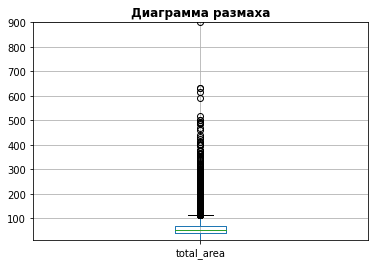

In [54]:
box_plot_initial('total_area')

Верхняя граница нормального размаха соответствует полуторному значению межквартильного (Q1-Q3) интервала, и равняется 114. Количество значений, превышающих это число, невысокое, что видно по значению медианы общей площади. Она равна 52 м.кв. и не стремится к более высоким значениям. 

**(B) Удаление редких и выбивающихся значений.**  В данной категориии такие значения будут отсеяны из предположения, что они не входят в полуторный межквартильный (Q1-Q3) размах.    

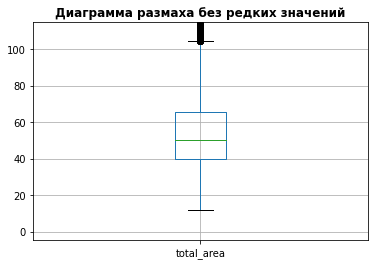

In [55]:
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1
df_total_area_good = df[(df['total_area'] > (Q1-1.5*IQR)) & (df['total_area'] < (Q3+1.5*IQR))]
df_total_area_good.boxplot(column=['total_area'])
plt.ylim((Q1-1.5*IQR), (Q3+1.5*IQR))
plt.title('Диаграмма размаха без редких значений', weight='bold')
plt.show()

In [56]:
df_total_area_good['total_area'].describe()

count    22080.000000
mean        54.572514
std         19.259981
min         12.000000
25%         40.000000
50%         50.500000
75%         65.800000
max        114.600000
Name: total_area, dtype: float64

После дополнительной очистки данных от выбивающихся и редких значений видим, что медианное значение площади "типичных" квартир снизилось до 50,5 м.кв. Построим гистограмму для общей площади квартир, используя очищенные данные. Определим оптимальное количество интервалов (карманов) для построения гистограммы по формуле Стерджесса:

In [57]:
n = 1 + (3.322 * (math.log10(len(df_total_area_good[['total_area']]))))
int(n)

15

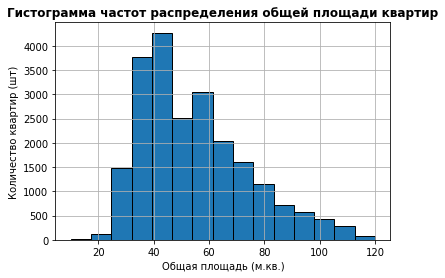

In [58]:
hist_total_area = df_total_area_good['total_area'].hist(bins = 15, range = (10, 120), edgecolor='black')
title = hist_total_area \
            .set_title('Гистограмма частот распределения общей площади квартир', weight='bold')
x_lable = hist_total_area \
            .set_xlabel('Общая площадь (м.кв.)')
y_lable = hist_total_area \
            .set_ylabel('Количество квартир (шт)')

#### Стоимость

Рассмотрим диаграмму размаха по стоимости квартир:

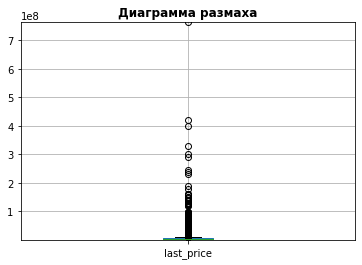

In [59]:
box_plot_initial('last_price')

In [60]:
df['last_price'].describe()

count    2.329600e+04
mean     6.529864e+06
std      1.078806e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Медианное значение стоимости квартир равно около 4,65 млн. руб. Верхняя граница нормального размаха составляет около 12 млн.руб. Из диаграммы следует, что в данных по стоимости квартир присутствуют значения, которые как сильно занижены (к примеру, 12190 руб.), так и сильно завышены (763 млн.руб).

**(B) Удаление редких и выбивающихся значений.**  В данной категориии такие значения будут отсеяны из предположения, что они не входят в полуторный межквартильный (Q1-Q3) размах.    

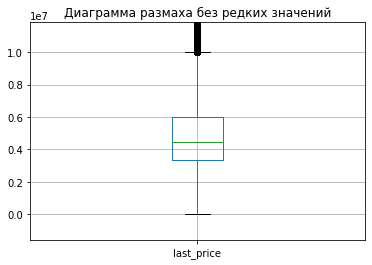

In [61]:
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
IQR = Q3 - Q1
df_last_price_good = df[(df['last_price'] > (Q1-1.5*IQR)) & (df['last_price'] < (Q3+1.5*IQR))]
df_last_price_good.boxplot(column=['last_price'])
plt.ylim((Q1-1.5*IQR), (Q3+1.5*IQR))
plt.title('Диаграмма размаха без редких значений')
plt.show()

In [62]:
df_last_price_good['last_price'].describe()

count    2.126600e+04
mean     4.854627e+06
std      2.213149e+06
min      1.219000e+04
25%      3.349000e+06
50%      4.450000e+06
75%      6.000000e+06
max      1.182000e+07
Name: last_price, dtype: float64

После дополнительной очистки данных от выбивающихся и редких значений видим, что медианное значение стоимости "типичных" квартир снизилось до 4,45 млн.руб (на 4,3% относительно первоначальных данных). Построим гистограмму распределения общей площади "типичных" квартир, используя предварительно обработанные данные за период 2014 - 2019 гг.:

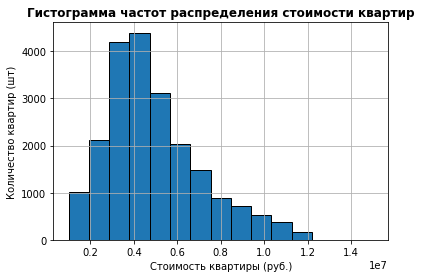

In [63]:
hist_total_price_cor = df_last_price_good['last_price'].hist(bins = 15, range = (1000000, 15000000), edgecolor='black')
title = hist_total_price_cor \
            .set_title('Гистограмма частот распределения стоимости квартир', weight='bold')
x_lable = hist_total_price_cor \
            .set_xlabel('Стоимость квартиры (руб.)')
y_lable = hist_total_price_cor \
            .set_ylabel('Количество квартир (шт)')

Так как доля выбивающихся значений невелика, их удаление в рамках выбранных квантилей не оказало значительного влияния на распределение стоимости и медианное значение. Тем не менее, в случае детального изучения рынка недвижимости возможно провести более направленный анализ по удалению выбросов.

#### Число комнат

Анализ мининимальных и максимальных значений исходных данных указывает, что число комнат варьируется от 0 до 19. Рассмотрим диаграмму размаха по количеству комнат:

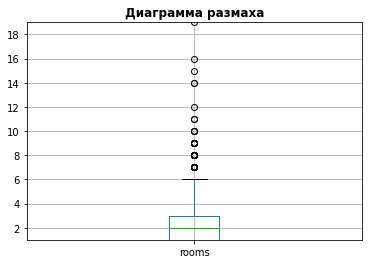

In [64]:
box_plot_initial('rooms')

In [65]:
df['rooms'].describe()

count    23296.000000
mean         2.086324
std          1.064186
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Медианное значение числа комнат равно 2. Активно выставляют на продажу 1, 2 и 3-х комнатные квартиры. Верхний предел нормального размаха составляет 6 комнат. 

**(B) Удаление редких и выбивающихся значений.** В данной категориии такие значения будут отсеяны из предположения, что они не входят в полуторный межквартильный (Q1-Q3) размах.

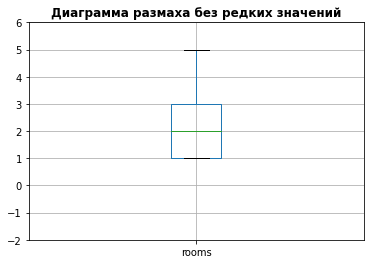

In [66]:
Q1 = df['rooms'].quantile(0.25)
Q3 = df['rooms'].quantile(0.75)
IQR = Q3 - Q1
df_rooms_good = df[(df['rooms'] > (Q1-1.5*IQR)) & (df['rooms'] < (Q3+1.5*IQR))]
df_rooms_good.boxplot(column=['rooms'])
plt.ylim((Q1-1.5*IQR), (Q3+1.5*IQR))
plt.title('Диаграмма размаха без редких значений', weight='bold')
plt.show()

In [67]:
df_rooms_good['rooms'].describe()

count    23107.000000
mean         2.046479
std          0.958863
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Построим гистограмму по числу комнат:

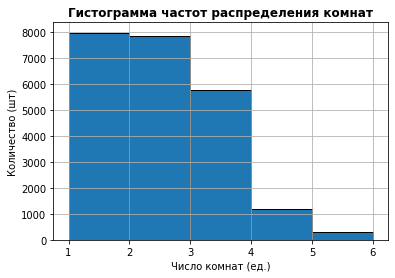

In [68]:
hist_rooms = df_rooms_good['rooms'].hist(bins = 5, range = (1, 6), edgecolor='black')
title = hist_rooms \
            .set_title('Гистограмма частот распределения комнат', weight='bold')
x_lable = hist_rooms \
            .set_xlabel('Число комнат (ед.)')
y_lable = hist_rooms \
            .set_ylabel('Количество (шт)')

Из диаграммы размаха и гистограммы видно, что медианное значение характеризует двухкомнатная квартира, и их доля в общем числе объявлений равна однокомнатным. Также активно продают трехкомнатные квартиры - их доля составляет четверть от общего числа. Квартиры с числом комнат, превышающем 5 представляют единичные случаи, либо могут быть результатом ошибки ввода данных.

#### Высота потолков

Рассмотрим диаграмму размаха по высоте потолков с учетом первоначальных ограничений в 2,4-4,2 м:

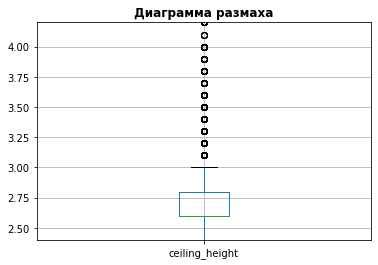

In [69]:
box_plot_initial('ceiling_height')

In [70]:
df['ceiling_height'].describe()

count    23295.000000
mean         2.717246
std          0.221029
min          2.400000
25%          2.600000
50%          2.600000
75%          2.800000
max          4.200000
Name: ceiling_height, dtype: float64

Верхняя граница нормального размаха равняется полуторному значению межквартильного (Q1-Q3) интервала, и составляет 3,1 м. Количество значений, превышающих это число, невысокое, что видно по значению медианы общей площади. Она равна 2,6 м. и не стремится к более высоким значениям.

**(B) Удаление редких и выбивающихся значений.** В данной категориии такие значения будут отсеяны из предположения, что они не входят в полуторный межквартильный (Q1-Q3) размах, характерный для "типичной" квартиры:

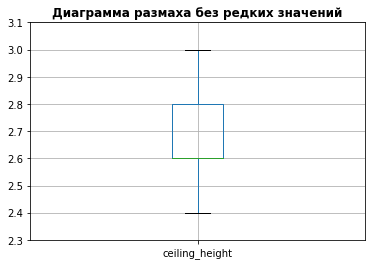

In [71]:
Q1 = df['ceiling_height'].quantile(0.25)
Q3 = df['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
df_ceiling_height_good = df[(df['ceiling_height'] > (Q1-1.5*IQR)) \
                               & (df['ceiling_height'] < (Q3+1.5*IQR))]
df_ceiling_height_good.boxplot(column=['ceiling_height'])
plt.ylim((Q1-1.5*IQR), (Q3+1.5*IQR))
plt.title('Диаграмма размаха без редких значений', weight='bold')
plt.show()

In [72]:
df_ceiling_height_good['ceiling_height'].describe()

count    21903.000000
mean         2.677284
std          0.145950
min          2.400000
25%          2.600000
50%          2.600000
75%          2.800000
max          3.000000
Name: ceiling_height, dtype: float64

Рассмотрим гистограмму по высоте потолков:

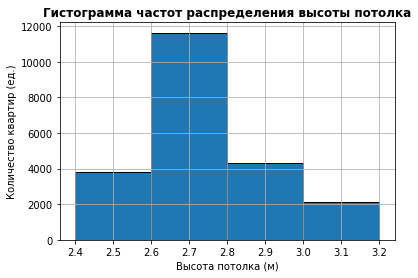

In [73]:
hist_ceiling_height = df_ceiling_height_good['ceiling_height'].hist(bins = 4, range = (2.4, 3.2),edgecolor='black')
title = hist_ceiling_height \
            .set_title('Гистограмма частот распределения высоты потолка', weight='bold')
x_lable = hist_ceiling_height \
            .set_xlabel('Высота потолка (м)')
y_lable = hist_ceiling_height \
            .set_ylabel('Количество квартир (ед.)')

Полученные данные указывают на то, что максимальное количество квартир имеет высоту потолка в интервале от 2,6 - до 2,8 м, при медиане 2,6 м, что характерно для типовых жилых зданий. Верхняя граница нормального размаха расположена на 3,1 м, что указывает на наличие квартир комфорт и бизнесс-класса.

#### Время продажи

Данные по времени продажи также характеризуются большой долей пропусков (около 13,4%), которым было присвоено значение -999. Для того чтобы исключить их влияние на медианное значение и разброс исключим их из анализа:

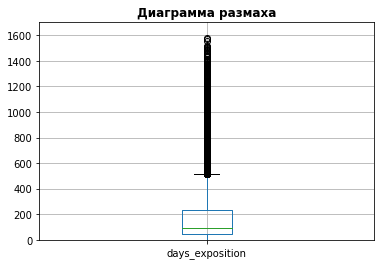

In [74]:
df_days_exposition_cor = df.query('days_exposition > 0')
df_days_exposition_cor.boxplot(column=['days_exposition'])
plt.ylim(0, 1700)
plt.title('Диаграмма размаха', weight='bold')
plt.show()

In [75]:
df_days_exposition_cor['days_exposition'].describe()

count    20154.000000
mean       181.258311
std        219.961156
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Верхняя граница нормального размаха равняется полуторному значению межквартильного (Q1-Q3) интервала, и составляет 512 дней. Количество значений, превышающих это число, невысокое, что видно по значению медианы длительности продаж. Она равна 96 дням и не стремится к более высоким значениям.

**(B) Удаление редких и выбивающихся значений.** В данной категориии такие значения будут отсеяны из предположения, что они не входят в полуторный межквартильный (Q1-Q3) размах, характерный для продажи "типичной" квартиры:

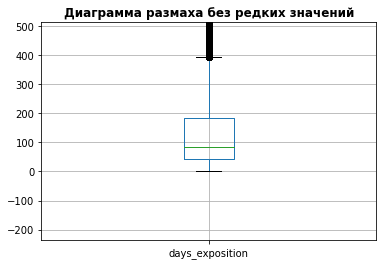

In [76]:
Q1 =  df_days_exposition_cor['days_exposition'].quantile(0.25)
Q3 = df_days_exposition_cor['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
df_days_exposition_good = df_days_exposition_cor[(df_days_exposition_cor['days_exposition'] > (Q1-1.5*IQR)) \
                               & (df_days_exposition_cor['days_exposition'] < (Q3+1.5*IQR))]
df_days_exposition_good.boxplot(column=['days_exposition'])
plt.ylim((Q1-1.5*IQR), (Q3+1.5*IQR))
plt.title('Диаграмма размаха без редких значений', weight='bold')
plt.show()

In [77]:
df_days_exposition_good['days_exposition'].describe()

count    18510.000000
mean       128.964668
std        121.569203
min          1.000000
25%         42.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

Рассмотрим гистограмму распределения по длительности продаж:

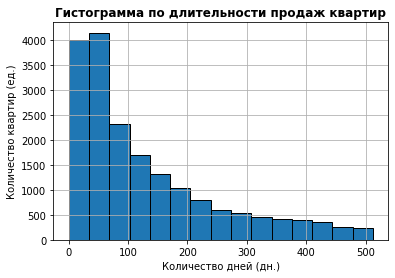

In [78]:
hist_days_exposition = df_days_exposition_good['days_exposition'].hist(bins = 15, range = (0, (Q3+1.5*IQR)),edgecolor='black')
title = hist_days_exposition \
            .set_title('Гистограмма по длительности продаж квартир', weight='bold')
x_lable = hist_days_exposition \
            .set_xlabel('Количество дней (дн.)')
y_lable = hist_days_exposition \
            .set_ylabel('Количество квартир (ед.)')

Полученные данные указывают на то, что средняя длительность продажи квартиры составляет 121 день, медианное значение - 85 дней. К быстрым продажам можно отнести сделки за менее чем 42 дня от даты подачи объявления. К медленным, те, что превышают 183 дня.

#### Удаленность от центра города

Удаленность от центра города - параметр в большей степени применимый к Санкт-Петербургу и наиболее близких к нему населенных пунктов.

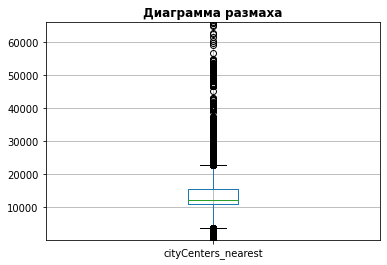

In [79]:
box_plot_initial('cityCenters_nearest')

In [80]:
df['cityCenters_nearest'].describe()

count    23296.000000
mean     13998.035714
std       7735.908675
min        181.000000
25%      10922.000000
50%      12243.000000
75%      15702.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [81]:
df_cityCenters_nearest_spb = df.query('locality_name == "санкт-петербург"')

In [82]:
df_cityCenters_nearest_spb['cityCenters_nearest'].describe()

count    15497.000000
mean     11590.629025
std       4821.204374
min        181.000000
25%       8366.000000
50%      12243.000000
75%      14933.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

Значение медианы расстояний до центра города с учетом других населенных пунктов составляет чуть больше 12 км.

**(B) Удаление редких и выбивающихся значений.** В данной категориии такие значения будут отсеяны из предположения, что они не входят в полуторный межквартильный (Q1-Q3) размах, характерный для продажи "типичной" квартиры:

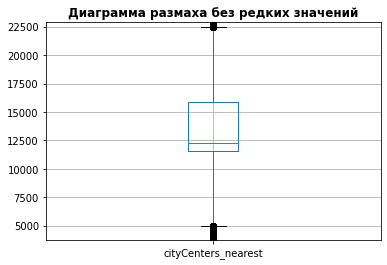

In [83]:
Q1 = df['cityCenters_nearest'].quantile(0.25)
Q3 = df['cityCenters_nearest'].quantile(0.75)
IQR = Q3 - Q1
df_cityCenters_nearest_good = df[(df['cityCenters_nearest'] > (Q1-1.5*IQR)) & (df['rooms'] < (Q3+1.5*IQR))]
df_cityCenters_nearest_good.boxplot(column=['cityCenters_nearest'])
plt.ylim((Q1-1.5*IQR), (Q3+1.5*IQR))
plt.title('Диаграмма размаха без редких значений', weight='bold')
plt.show()

In [84]:
#Характеристики удаленности от центра города для всех населенных пунктов
df_cityCenters_nearest_good['cityCenters_nearest'].describe()

count    22298.000000
mean     14516.420486
std       7497.317147
min       3752.000000
25%      11538.000000
50%      12243.000000
75%      15914.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [85]:
# Характеристики удаленности от центра города для СПб
df_cityCenters_nearest_good_spb = df_cityCenters_nearest_good.query('locality_name == "санкт-петербург"')
df_cityCenters_nearest_good_spb['cityCenters_nearest'].describe()

count    14499.000000
mean     12222.145113
std       4311.513565
min       3752.000000
25%       9479.000000
50%      12548.000000
75%      15076.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

Полученный результат указывает, что медианное значение в результате удаления выбросов изменилось незначительно от первоначального. Среднее расстояние до центра города несколько уменьшилось для Санкт-Петербурга, по сравнению с расстоянием от других населенных пунктов. Также снизилось стандартное отклонение, указывающее на меньший разброс значений.

### Оценка влияния факторов на стоимость квартир 

Используя исходные данные, предварительно оценим степень взаимосвязи различных параметров с общей стоимостью квартир:

In [86]:
cor_coef = df.corr()

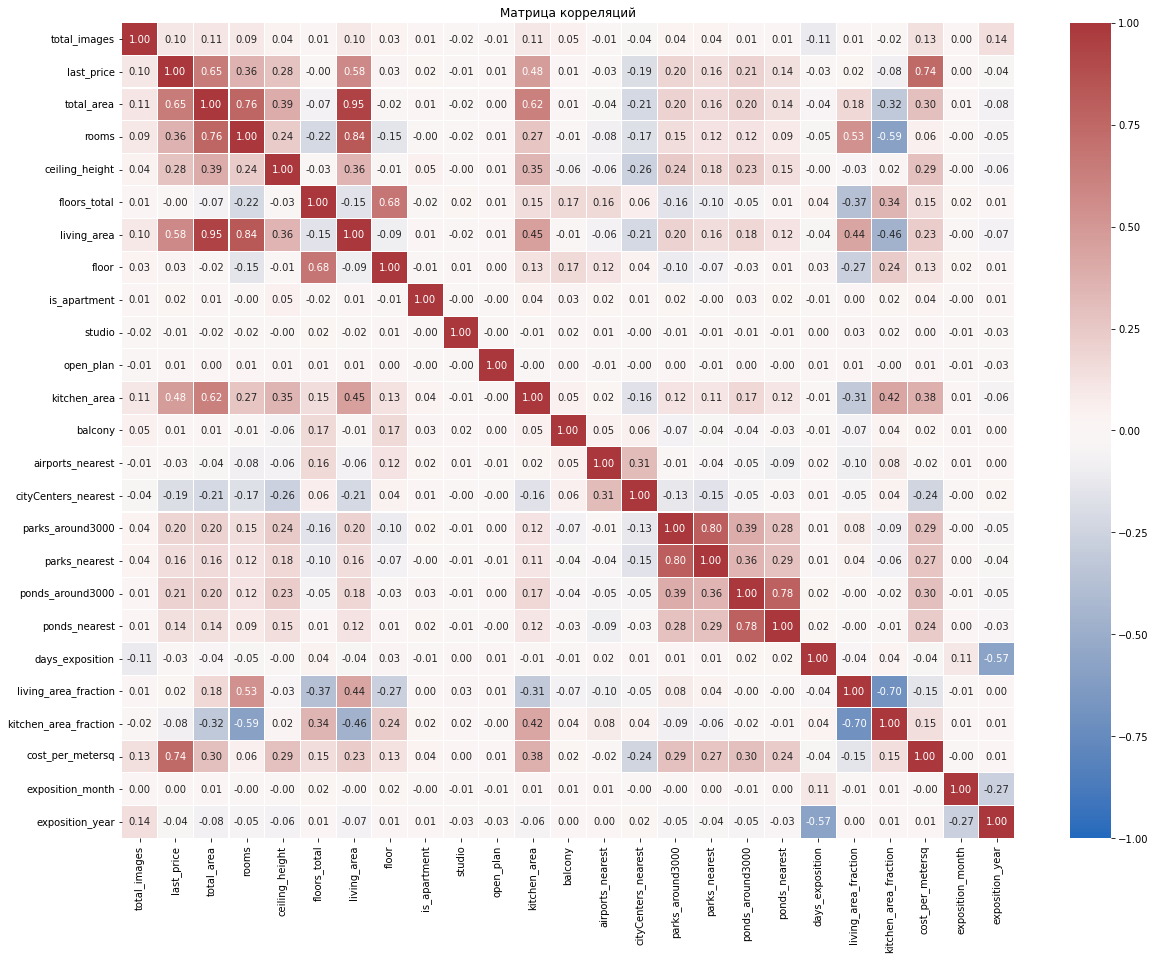

In [87]:
fig, ax = plt.subplots(figsize=(20, 15))
g = sns.heatmap(cor_coef, annot=True, fmt='.2f', vmin=-1, vmax=1, linewidths=.1, cmap='vlag')
g.set_title('Матрица корреляций')
plt.show()

Из графического представления матрицы корреляций следует, что на интересующую нас общую стоимость квартир оказывает влияние несколько параметров: общая площадь (и связанные с ней жилая площадь и площадь кухни), количество комнат. В последующих разделах рассмотрим влияние этих и других параметров более подробно, с учетом использования предобработанных данных и, в некоторых случаях, категорий параметров. 

#### Общая площадь

Рассмотрим влияние общей площади квартиры на ее стоимость:

In [88]:
df_area_price_good = df_total_area_good.merge(df_last_price_good, on='id')

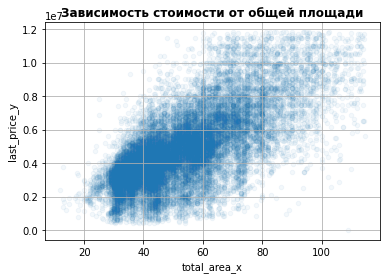

In [89]:
ax = df_area_price_good.plot(x='total_area_x', y='last_price_y', kind='scatter', alpha = 0.05, grid=True)
plt.title('Зависимость стоимости от общей площади', weight='bold')
plt.show()

In [90]:
corr_area_price_good = df_area_price_good[['total_area_x', 'last_price_y']].corr()
corr_area_price_good

,total_area_x,last_price_y
total_area_x,1.000000,0.691474
last_price_y,0.691474,1.000000


Наблюдается сильная корреляция между общей площадью и стоимостью квартир. С увеличением общей площади стоимость увеличивается. Наиболее сильная корреляция цены и площади наблюдается для квартир площадью от 30 до 60 м.кв.

Дополнительно оценим, как влияет общая площадь квартиры на стоимость за 1 м. кв.:

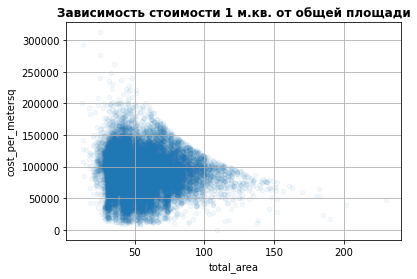

In [91]:
df_last_price_good.plot(x='total_area', y='cost_per_metersq', kind='scatter', alpha = 0.05, grid=True)
plt.title('Зависимость стоимости 1 м.кв. от общей площади', weight='bold')
plt.show()

In [92]:
corr_area_price_per_msq_good = df_last_price_good[['total_area', 'cost_per_metersq']].corr()
corr_area_price_per_msq_good

,total_area,cost_per_metersq
total_area,1.000000,-0.091768
cost_per_metersq,-0.091768,1.000000


Корреляция между общей площадью и стоимостью за 1 м.кв. не прослеживается.

#### Число комнат

Рассмотрим влияние количества комнат в квартире на ее стоимость:

In [93]:
df_rooms_price_good = df_rooms_good.merge(df_last_price_good, on='id')

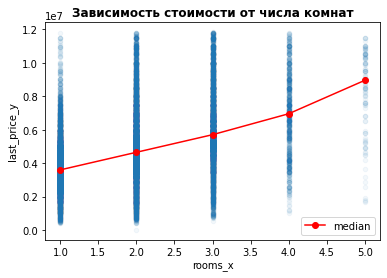

In [94]:
ax = df_rooms_price_good.plot(x='rooms_x', y='last_price_y', kind='scatter', alpha = 0.05, grid=True)
plt.title('Зависимость стоимости от числа комнат', weight='bold')

# добавим значение медианы на график
df_rooms_price_good.groupby('rooms_x')['last_price_y'] \
                   .agg(['median']) \
                   .plot(kind='line', y='median', style = '-or', legend = True, label = 'median', ax=ax)
plt.show()

Данные ожидаемо показывают, что с увеличением числа комнат стоимость квартиры возрастает практически линейно.

#### Этаж

Рассмотрим влияние этажа на стоимость квартиры:

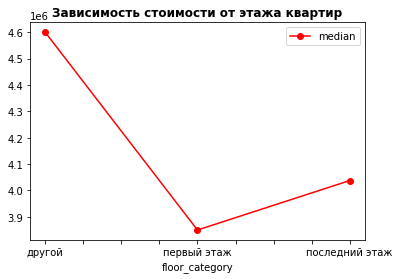

In [95]:
df_last_price_good.groupby('floor_category')['last_price'] \
                   .agg(['median']) \
                   .plot(kind='line', y='median', style = '-or', legend = True, label = 'median')
plt.title('Зависимость стоимости от этажа квартир', weight='bold')
plt.show()

In [96]:
df_last_price_good.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')

,last_price
floor_category,
другой,4600000
первый этаж,3850000
последний этаж,4037500


Этаж также оказывает влияние на стоимость квартиры. Цена квартир на последнем этаже превышает стоимость квартир на первом этаже примерно на 5%. На других этажах медианное значение стоимости квартиры выше почти на 17% в сравнении с первым этажом. 

#### Удаленность от центра города

Оценим влияние удаленности квартиры от центра города на стоимость:

In [97]:
df_cityCenters_nearest_spb_price_good = df_cityCenters_nearest_good_spb.merge(df_last_price_good, on='id')

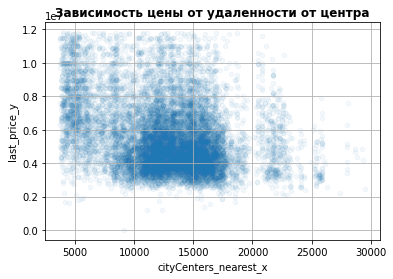

In [98]:
ax = df_cityCenters_nearest_spb_price_good \
                            .plot(x='cityCenters_nearest_x', y='last_price_y', kind='scatter', alpha = 0.05, grid=True)
plt.title('Зависимость цены от удаленности от центра', weight='bold')
plt.show()

In [99]:
corr_df_cityCenters_nearest_spb_price_good = \
                        df_cityCenters_nearest_spb_price_good[['cityCenters_nearest_x', 'last_price_y']].corr()
corr_df_cityCenters_nearest_spb_price_good

,cityCenters_nearest_x,last_price_y
cityCenters_nearest_x,1.000000,-0.313877
last_price_y,-0.313877,1.000000


Данные графика и коэффициенты корреляции показывают на умеренное влияние расстояния от центра города на формирование стоимости квартиры: чем дальше расположение квартиры от центра, тем стоимость ниже.

#### Дата размещения объявления

Оценим влияние времени размещения объявления на стоимость квартир:

In [100]:
def plot_date(price, date_parameter):
    """"
    Функция строит диаграмму размаха и возвращает отсортированные сводные данные к диаграмме
    """
    figure = df_last_price_good.boxplot(price, by = date_parameter, grid = True, figsize = (6, 6))
    plt.show()
    return df_last_price_good \
                    .pivot_table(index = date_parameter, values = price, aggfunc = 'median') \
                    .sort_values(by = price, ascending = False)                

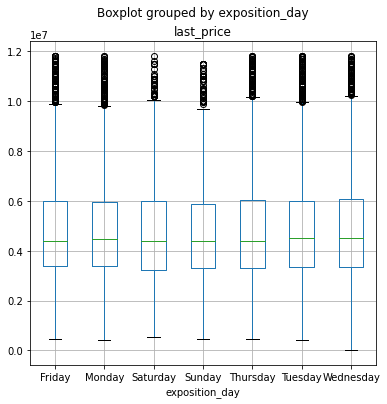

,last_price
exposition_day,
Tuesday,4500000
Wednesday,4500000
Monday,4450000
Friday,4400000
Saturday,4400000
Sunday,4400000
Thursday,4400000


In [101]:
# Вызов функции построения диаграммы размаха стоимости в зависимости от дня публикации объявления
plot_date('last_price', 'exposition_day')

День публикации не оказывает значительного влияния на стоимость квартиры.

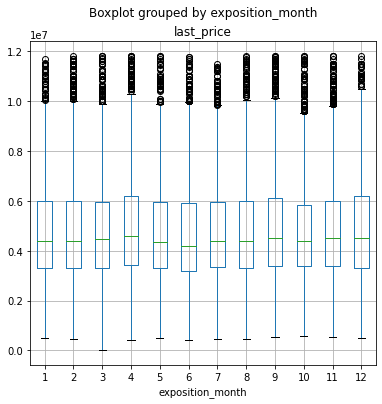

,last_price
exposition_month,
4,4590000
11,4500000
12,4500000
9,4499500
3,4450000
1,4400000
2,4400000
8,4400000
10,4400000


In [102]:
# Вызов функции построения диаграммы размаха стоимости в зависимости от месяца публикации объявления
plot_date('last_price', 'exposition_month')

Месяц публикации оказывает умеренное влияние на стоимость квартир, тем не менее, это может быть вызванно внешними экономическими факторами нежели сезонностью. 

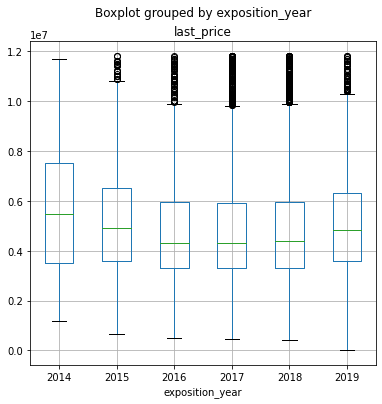

,last_price
exposition_year,
2014,5475000.0
2015,4890000.0
2019,4836837.5
2018,4400000.0
2016,4300000.0
2017,4300000.0


In [103]:
# Вызов функции построения диаграммы размаха стоимости в зависимости от месяца публикации объявления
plot_date('last_price', 'exposition_year')

Наиболее ярко изменения в стоимости квартир прослеживается в годовом измерении. Наибольшая стоимость квартир наблюдалась в 2014-2015 гг., после чего наблюдался спад. Цены на квартиры вернулись на максимальные значения (в исследуемом интервале данных) в 2019 г.

### ТОП10 населённых пунктов с самой высокой и низкой стоимостью жилья

Для дальнейшего анализа выберем 10 населенных пунктов с максимальным количеством объявлений:

In [104]:
adv_top10_locations = df_last_price_good.groupby('locality_name') \
                            .agg({'locality_name':'count', 'cost_per_metersq':['mean','median']}) \
                            .astype('int64')

In [105]:
adv_top10_locations.columns = [' '.join(col).strip() for col in adv_top10_locations.columns.values]
adv_top10_locations = adv_top10_locations.rename(columns={'locality_name count': 'locality_name_count', \
                                                          'cost_per_metersq mean': 'cost_per_metersq_mean', \
                                                          'cost_per_metersq median': 'cost_per_metersq_median'})
adv_top10_locations.sort_values(by = 'cost_per_metersq_median', ascending = False).head(10)

,locality_name_count,cost_per_metersq_mean,cost_per_metersq_median
locality_name,,,
санкт-петербург,13538,105291,101739
кудрово,164,99493,99760
зеленогорск,22,100636,98596
сестрорецк,171,99449,98341
пушкин,338,100290,98325
посёлок левашово,1,96997,96997
посёлок парголово,323,90289,91917
деревня кудрово,282,92228,91617
деревня мистолово,11,98549,90888


In [106]:
data1=adv_top10_locations.sort_values(by = 'cost_per_metersq_mean', ascending = False).head(10)
data2=adv_top10_locations.sort_values(by = 'cost_per_metersq_median', ascending = False).head(10)

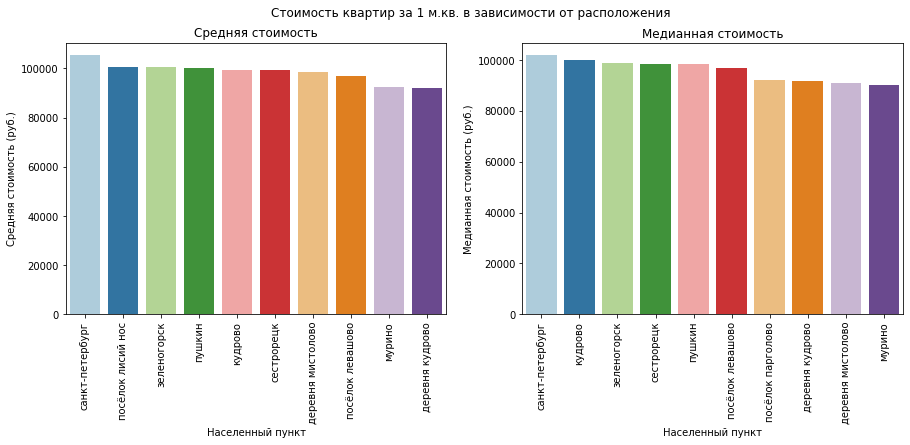

In [107]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

fig.suptitle('Cтоимость квартир за 1 м.кв. в зависимости от расположения')
g = sns.barplot(ax=axes[0], x=data1.index, y=data1['cost_per_metersq_mean'], palette = 'Paired')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Средняя стоимость')
g.set_ylabel('Средняя стоимость (руб.)')
g.set_xlabel('Населенный пункт')

g = sns.barplot(ax=axes[1], x=data2.index, y=data2['cost_per_metersq_median'], palette = 'Paired')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Медианная стоимость')
g.set_ylabel('Медианная стоимость (руб.)')
g.set_xlabel('Населенный пункт')

plt.show()

Из данных сводной таблицы и гистограмм видно, что максимальная средняя стоимость за 1 м.кв. характерная для Санкт-Петербурга, поселка "Лисий нос", Зеленогорска, г. Пушкин и Кудрово. Максимальная медианная стоимость жилья характерна для Санкт-Петербурга, Кудрово, Зеленогорска, Сестрорецка, г.Пушкин.

### Выявление центра города по изменению цены

Определим условную границу центра города в зависимости от изменения цен на недвижимость:

Text(0.5, 1.0, 'Средняя стоимость квартиры в зависимости от удаленности от центра')

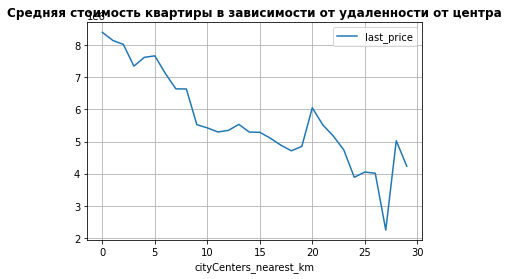

In [108]:
df_last_price_good['cityCenters_nearest_km'] = (df_last_price_good['cityCenters_nearest'] / 1000).round().astype('int64')
df_last_price_good_spb = df_last_price_good.query('locality_name == "санкт-петербург"')
df_last_price_good_spb.pivot_table(index = 'cityCenters_nearest_km', values='last_price', aggfunc='mean') \
                      .plot(grid=True)
plt.title('Средняя стоимость квартиры в зависимости от удаленности от центра', weight='bold')

Полученные результаты для Санкт-Петербурга об изменении цены в зависимости от удаленности от центра подтверждают ожидаемый вывод, что с увеличением расстояния от центра города средняя стоимость квартир снижается. Можно также условно выделить 3 области по характеру формирования цены:
* до 8 км - область характеризуется интенсивным ростом средней цены на квартиры по мере приближения к центру;
* от 8 до 18 км - область умеренного роста, формирование цены характерно для спальных районов;
* свыше 18 км - область колебаний, стоимость жилья ниже, чем в центральной части, но на нее может оказывать влияние престижность района, наличие/отсутствие индустриальных зон, транспорт, природные зоны.  

### Квартиры: центр vs. все районы

Оценим как отличается стоимость недвижимости в центре Санкт-Петербурга и в целом для города:

#### Сравнение параметров квартир

In [109]:
# Устанавливаются ограничения на высоту потолка, чтобы исключить из анализа значения -1 (взамен пропусков)
df_last_price_good_spb = df_last_price_good_spb.query('ceiling_height > 0')
# Условие принажлежности к центру города
df_last_price_good_spb_citycenter = df_last_price_good_spb.query('cityCenters_nearest_km <= 8')

In [110]:
def hist_plot(adv_number, parameter): 
    """
    Функция определяет медианное значение распределения квартир в зависимости от интересующего параметра (общая площадь,
    цена, количество комнат, этаж, высота потолка) для центра города и всех районов города в целом. 
    Результат: столбчатая незаполненная гистограмма.
    """        
    df_last_price_good_spb_citycenter_stat = df_last_price_good_spb_citycenter \
                                                .pivot_table(index = adv_number, values = parameter, aggfunc = 'median')
    
    df_last_price_good_spb_stat = df_last_price_good_spb \
                                                .pivot_table(index = adv_number, values = parameter, aggfunc='median')

    ax = df_last_price_good_spb_citycenter_stat.plot(
        kind='hist',
        y=parameter,
        histtype='step',
        bins=25,
        linewidth=5,
        alpha=0.7,
        label='city_center_spb',
    )
    plt.xlabel(parameter)
    
    df_last_price_good_spb_stat.plot(
        kind='hist',
        y=parameter,
        histtype='step',
        bins=25,
        linewidth=5,
        alpha=0.7,
        label='all_districts_spb',
        ax=ax,
        grid=True,
        legend=True
    )
    
    df0 = df_last_price_good_spb_citycenter_stat[parameter]
    df1 = df_last_price_good_spb_stat[parameter]
    
    display(pd.merge(df0.describe(), df1.describe(), \
                   left_index=True, right_index=True, suffixes=('_city_center_spb', '_all_districts_spb')).round(1))

**(A) Общая площадь**

,total_area_city_center_spb,total_area_all_districts_spb
count,2726.0,13537.0
mean,65.7,54.9
std,23.6,19.5
min,12.0,12.0
25%,47.0,40.3
50%,63.0,50.8
75%,80.0,65.6
max,190.0,190.0


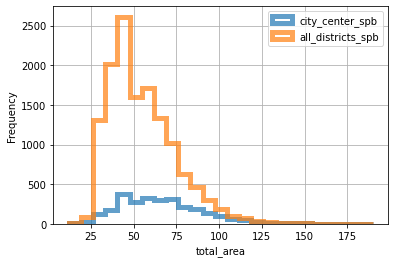

In [111]:
hist_plot('id', 'total_area')

Из гистограммы и описания видно, что квартиры, находящиеся в центре города, имеют большую площадь (63,0 м.кв.), чем в целом по городу (50.8 м.кв).

**(B) Цена**

,last_price_city_center_spb,last_price_all_districts_spb
count,2726.0,13537.0
mean,7312924.5,5677689.7
std,2192622.9,2085652.8
min,1600000.0,12190.0
25%,5690000.0,4100000.0
50%,7200000.0,5150000.0
75%,8990000.0,6890000.0
max,11820000.0,11820000.0


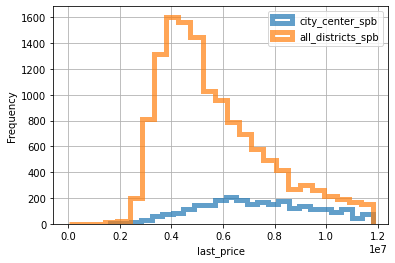

In [112]:
hist_plot('id', 'last_price')

Из гистограммы и описания видно, что квартиры, находящиеся в центре города, имеют большую стоимость. Медианное значение стоимости для центра города: 7 млн 300 тыс. руб., для всего города: 5 млн. 250 тыс. руб.

**(С) Стоимость за 1 м.кв.**

,cost_per_metersq_city_center_spb,cost_per_metersq_all_districts_spb
count,2726.0,13537.0
mean,116493.8,105292.4
std,29191.2,23092.1
min,15345.0,111.0
25%,95039.5,89456.0
50%,112251.0,101744.0
75%,133928.0,117391.0
max,292307.0,312240.0


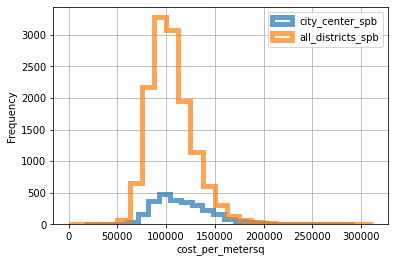

In [113]:
hist_plot('id', 'cost_per_metersq')

Стоимость жилья за 1 м.кв. также характеризуется повышенным значением для центра города.

**(D) Количество комнат**

,rooms_city_center_spb,rooms_all_districts_spb
count,2726.0,13537.0
mean,2.3,2.0
std,1.0,0.9
min,1.0,1.0
25%,2.0,1.0
50%,2.0,2.0
75%,3.0,3.0
max,6.0,6.0


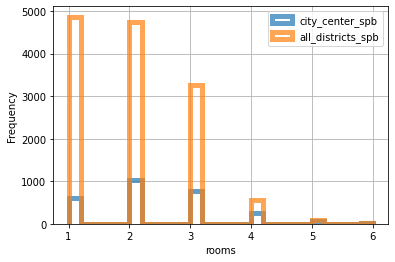

In [114]:
hist_plot('id', 'rooms')

Распределение комнатности для центра города и всего города примерно одинаковое. Доля, однокамнатных квартир в центре, правда, ниже, чем для всего города.

**(E) Число этажей**

,floor_city_center_spb,floor_all_districts_spb
count,2726.0,13537.0
mean,4.2,6.2
std,3.0,4.9
min,1.0,1.0
25%,2.0,3.0
50%,3.0,5.0
75%,5.0,9.0
max,23.0,33.0


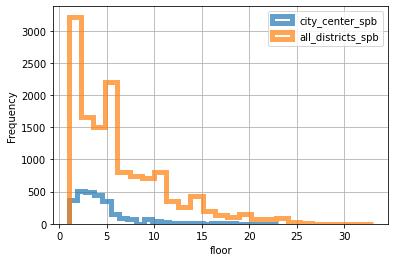

In [115]:
hist_plot('id', 'floor')

Центр города в большей степени представлен низкоэтажным жильем (медиана - 3 этажа), в то время как в среднем по городу (медиана -5 этажей) больше распространены многоэтажки.

**(F) Высота потолков**

,ceiling_height_city_center_spb,ceiling_height_all_districts_spb
count,2726.0,13537.0
mean,2.9,2.7
std,0.3,0.2
min,2.4,2.4
25%,2.6,2.6
50%,2.8,2.6
75%,3.0,2.8
max,4.2,4.2


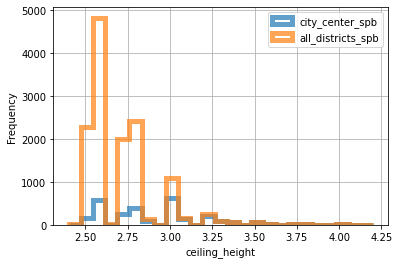

In [116]:
hist_plot('id', 'ceiling_height')

Для квартир в центре города характерны более высокие потолки (2.8 м), чем в целом по всему городу (2,6 м).

#### Факторы, влияющие на стоимость квартир 

Рассмотрим как различные факторы влияют на стоимость квартир для центральной части Санкт-Петербурга и переферии:

In [117]:
df_last_price_good_spb_citycenter = df_last_price_good_spb.query('cityCenters_nearest <= 8000')
df_last_price_good_spb_outside_citycenter = df_last_price_good_spb.query('cityCenters_nearest > 8000')

In [118]:
def scatter_plot(parameter1, parameter2, add_median=False): 
    """
    Функция строит точечные графики зависимости цены от интересующего параметра. При необходимости добавляет медианные значения.
    """
    ax = df_last_price_good_spb_citycenter.plot(
    kind='scatter',
    x=parameter1,
    y=parameter2,
    alpha=0.05,
    color='red',
    label='city_center_spb'
    )
      
    df_last_price_good_spb_outside_citycenter.plot(
    kind='scatter',
    x=parameter1,
    y=parameter2,
    alpha=0.01,
    color='blue',
    label='outside_city_center_spb',
    grid=True,
    ax=ax,
    legend=True
    )
    
    if add_median:
        df_last_price_good_spb_outside_citycenter.groupby(parameter1)[parameter2] \
        .agg(['median']) \
        .plot(kind='line', y='median', style = '-ob', legend = True, label = 'median_outside_city_center_spb', ax=ax)
    
        df_last_price_good_spb.groupby(parameter1)[parameter2] \
        .agg(['median']) \
        .plot(kind='line', y='median', style = '-or', legend = True, label = 'median_city_center_spb', ax=ax)

In [119]:
def person_coeff(caterory):
    """
    Функция вычисляет коэффициенты корреляции
    """
    print('Коэффициент корреляции Пирсона между ценой и изучаемым параметром для центра СПб:', \
      round(df_last_price_good_spb_citycenter['last_price'] \
            .corr(df_last_price_good_spb_citycenter[caterory]), 3))
    print('Коэффициент корреляции Пирсона между ценой и изучаемым параметром за пределами центра СПб:', \
      round(df_last_price_good_spb_outside_citycenter['last_price'] \
            .corr(df_last_price_good_spb_outside_citycenter[caterory]), 3))

**(A) Общая площадь - Цена**

,last_price_city_center_spb,last_price_outside_city_center_spb
count,2413.0,11124.0
mean,7398545.7,5304404.4
std,2154632.7,1872199.1
min,1600000.0,12190.0
25%,5800000.0,3950000.0
50%,7300000.0,4850000.0
75%,9000000.0,6200000.0
max,11820000.0,11800000.0


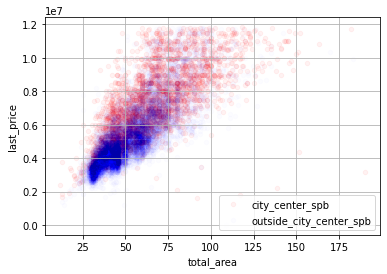

Коэффициент корреляции Пирсона между ценой и изучаемым параметром для центра СПб: 0.686
Коэффициент корреляции Пирсона между ценой и изучаемым параметром за пределами центра СПб: 0.8


In [120]:
df0 = df_last_price_good_spb_citycenter['last_price']
df1 = df_last_price_good_spb_outside_citycenter['last_price']
    
display(pd.merge(df0.describe(), df1.describe(), left_index=True, right_index=True, suffixes=('_city_center_spb', '_outside_city_center_spb')) \
                                                                  .round(1))
scatter_plot('total_area', 'last_price')
plt.show()
person_coeff('total_area')

Из данных графика видно, что наблюдается сильная корреляции между общей площадью квартир и их стоимостью. С увеличением площади - стоимость возрастает. Для области за пределами центра корреляция более сильная, но это может быть связано с большим числом значений в выборке, в сравнении с центром города.

**(B) Количество комнат - Цена**

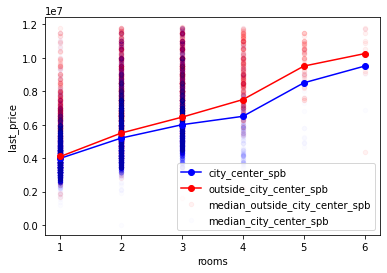

Коэффициент корреляции Пирсона между ценой и изучаемым параметром для центра СПб: 0.477
Коэффициент корреляции Пирсона между ценой и изучаемым параметром за пределами центра СПб: 0.495


In [121]:
scatter_plot('rooms', 'last_price', add_median=True)
plt.show()
person_coeff('rooms')

Такой же характер носит и зависимость стоимости квартир от числа комнат. Для центра города медианные значения указывают на повышенную стоимость квартир с увеличением числа комнат.

**(С) Количество этажей - Цена**

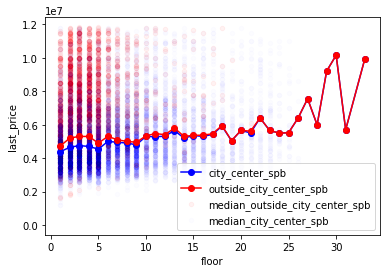

Коэффициент корреляции Пирсона между ценой и изучаемым параметром для центра СПб: 0.477
Коэффициент корреляции Пирсона между ценой и изучаемым параметром за пределами центра СПб: 0.495


In [122]:
scatter_plot('floor', 'last_price', add_median=True)
plt.show()
person_coeff('rooms')

Для центра города наблюдается повышенная стоимость квартир для всех этажей. После 5-го этажа зависимость цена - этаж примерно одинакова как для центра, так и для переферии, т.к. число квартир в выборке постепенно уменьшается в каждой категории.

**(D) Удаленность от центра - Цена**

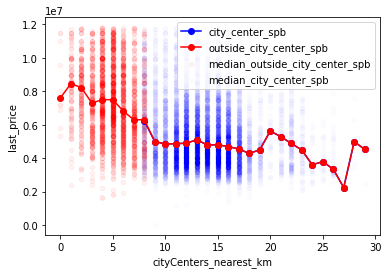

Коэффициент корреляции Пирсона между ценой и изучаемым параметром для центра СПб: -0.178
Коэффициент корреляции Пирсона между ценой и изучаемым параметром за пределами центра СПб: -0.122


In [123]:
scatter_plot('cityCenters_nearest_km', 'last_price', add_median=True)
plt.show()
person_coeff('cityCenters_nearest_km')

С удаленностью от центра города стоимость квартир уменьшается практически равномерно. Корреляция довольно умеренная. Имеются отдельные всплески в цене, что может быть связано с удобством и комфортом отдельных удаленных районов города.

**(E) Размещение объявления - Цена**

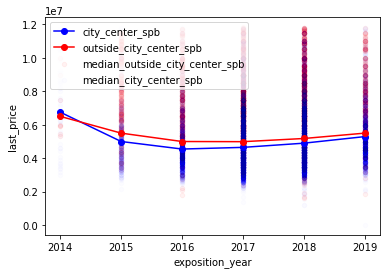

Коэффициент корреляции Пирсона между ценой и изучаемым параметром для центра СПб: -0.011
Коэффициент корреляции Пирсона между ценой и изучаемым параметром за пределами центра СПб: 0.066


In [124]:
scatter_plot('exposition_year', 'last_price', add_median=True)
plt.show()
person_coeff('exposition_year')

Корреляция между годом размещения объявления и ценой практически отсутствует.

**Промежуточные выводы:**
* Медианное значение общей площади "типичных" квартир в Санкт-Петербурге и близлежайших населенных пунктах составляет 50,5 м.кв.
* Медианное значение стоимости "типичных" квартир в период 2014-2019 гг. в Санкт-Петербурге и близлежайших населенных пунктах составляло 4 млн. 450 тыс.руб
* Типичный вариант квартиры: двухкомнатная квартира с высотой потолка 2,6 м.
* Средняя длительность продажи квартиры составляет 121 день, медианное значение длительности продажи - 85 дней. К быстрым продажам можно отнести сделки за менее чем 42 дня от даты подачи объявления. К медленным, те, что превышают 183 дня.
* Наибольшая стоимость квартир наблюдалась в 2014-2015 гг., после чего наблюдался спад. Цены на квартиры вернулись на максимальные значения (в исследуемом интервале данных) в 2019 г.
* Максимальная стоимость жилья характерна для Санкт-Петербурга, Кудрово, Зеленогорска, Сестрорецка и Пушкина.
* Наблюдается сильная корреляция между общей площадью и стоимостью квартир. С увеличением общей площади стоимость увеличивается.
* С увеличением числа комнат стоимость квартиры возрастает практически линейно.
* Цена квартир на последнем этаже превышает стоимость квартир на первом этаже примерно на 5%. На других этажах медианное значение стоимости квартиры выше почти на 17% в сравнении с первым этажом.
* Расстояние от центра города на формирование стоимости квартиры носит умеренный характер: чем дальше расположение квартиры от центра, тем стоимость ниже.
* Квартиры, находящиеся в центре Санкт-Петербурга, имеют большую площадь (63,0 м.кв.), чем в целом по городу (50.8 м.кв).
* Квартиры, находящиеся в центре Санкт-Петербурга, имеют большую стоимость, чем в целом по городу. Медианное значение стоимости для центра города (2014 - 2019 гг.): 7 млн 200 тыс. руб., для всего города: 5 млн. 150 тыс. руб.
* Центр города в большей степени представлен низкоэтажным жильем (медиана - 3 этажа), в то время как в среднем по городу (медиана - 5 этажей) больше распространены многоэтажки.
* Для квартир в центре Санкт-Петербурга характерны более высокие потолки (2,8 м), чем в целом по всему городу (2,6 м).
* Наблюдается сильная корреляции между общей площадью квартир и их стоимостью. С увеличением площади - стоимость возрастает. Для районов за пределами центра Санкт-Петербурга корреляция более сильная, но это может быть связано с большим числом значений в выборке, в сравнении с центром города. Такой же характер носит и зависимость стоимости квартир от числа комнат. Для центра города медианные значения указывают на повышенную стоимость квартир с увеличением числа комнат.
* С удаленностью от центра города стоимость квартир уменьшается практически равномерно. Корреляция довольно умеренная. Имеются отдельные всплески в цене, что может быть связано с удобством и комфортом отдельных удаленных районов города.
* Для центра города наблюдается повышенная стоимость квартир для всех этажей.

## Общий вывод

Проанализировав полученные данные можно сделать следующие выводы:

* **Исходные данные** имеют ряд существенных недостатков, устранение которых на этапе сбора информации может значительно повысить точность дальнейшего анализа. Среди них (в % от общей выборки): пропущенные данные об удалении от центра города (23%), водоемов/парков (более 60%), площади кухни (около 10%) и др. Пропуски были условно разделены на 4 группы и обработаны различными алгоримами в зависимости от принадлежности к конкретной группе. В исходной информации отсутствуют дубликаты. Рекомендуется предусмотреть в форме ввода данных использование выпадающего меню для параметров, характеризующих наличие балкона, является ли недвижимость аппартаментами и стандартные высоты потолков.

* **Расчёты и добавление результатов в таблицу** позволили добавить в исходный датафрейм дополнительные параметры о стоимости 1 м.кв. недвижимости. Исходная дата подачи объявления была разделена на отдельные параметры дня, месяца и года размещения объявления. Этажу, на котором размещена квартира, была присвоена категория: "первый", "последний", "другой". Было определено соотношение между жилой и общей площадью, а также отношение площади кухни к общей площади. Данные выделены в отдельные столбцы.

* **Анализ данных** позволил выявить следующие закономерности:

Для Санкт-Петербурга и близлежайших населенных пунктов:
* Типичный вариант квартиры: двухкомнатная квартира с высотой потолка 2,6 м.
* Медианное значение общей площади составляет 50,5 м.кв.
* Медианное значение стоимости квартир в период 2014-2019 гг. составляло 4 млн. 450 тыс.руб
* Средняя длительность продажи квартиры составляет 121 день, медианное значение длительности продажи - 85 дней. К быстрым продажам можно отнести сделки за менее чем 42 дня от даты подачи объявления. К медленным, те, что превышают 183 дня.
* Наибольшая стоимость квартир наблюдалась в 2014-2015 гг., после чего наблюдался спад. Цены на квартиры вернулись на максимальные значения (в исследуемом интервале данных) в 2019 г.
* Максимальная стоимость жилья характерна для Санкт-Петербурга, Кудрово, Зеленогорска, Сестрорецка и Пушкина.
* Наблюдается сильная корреляция между общей площадью и стоимостью квартир. С увеличением общей площади стоимость увеличивается.
* С увеличением числа комнат стоимость квартиры возрастает практически линейно.
* Цена квартир на последнем этаже превышает стоимость квартир на первом этаже примерно на 5%. На других этажах медианное значение стоимости квартиры выше почти на 17% в сравнении с первым этажом.
* Расстояние от центра города на формирование стоимости квартиры носит умеренный характер: чем дальше расположение квартиры от центра, тем стоимость ниже.

Для Санкт-Петербурга:
* Квартиры, находящиеся в центре, имеют большую площадь (63,0 м.кв.), чем в целом по городу (50.8 м.кв).
* Квартиры, находящиеся в центре, имеют большую стоимость, чем в целом по городу. Медианное значение стоимости для центра города (2014 - 2019 гг.): 7 млн 200 тыс. руб., для всего города: 5 млн. 150 тыс. руб.
* Центр города в большей степени представлен низкоэтажным жильем (медиана - 3 этажа), в то время как в среднем по городу (медиана - 5 этажей) больше распространены многоэтажки.
* Для квартир в центре характерны более высокие потолки (2,8 м), чем в целом по всему городу (2,6 м).
* Наблюдается сильная корреляции между общей площадью квартир и их стоимостью. С увеличением площади - стоимость возрастает. Для районов за пределами центра корреляция более сильная, но это может быть связано с большим числом значений в выборке, в сравнении с центром города. Такой же характер носит и зависимость стоимости квартир от числа комнат. Для центра города медианные значения указывают на повышенную стоимость квартир с увеличением числа комнат.
* С удаленностью от центра города стоимость квартир уменьшается практически равномерно. Корреляция довольно умеренная. Имеются отдельные всплески в цене, что может быть связано с удобством и комфортом отдельных удаленных районов города.
* Для центра города наблюдается повышенная стоимость квартир для всех этажей.